In [217]:
from math import sqrt
from cvxopt.blas import dot
from cvxopt.solvers import qp, options
import pylab
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from cvxopt import matrix, solvers

VERBOSE = False

# Example of the professor

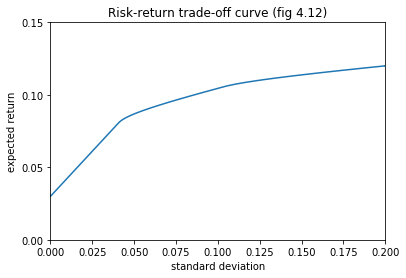

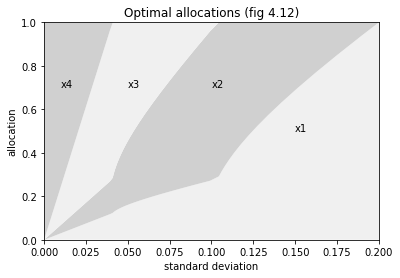

In [221]:
# Figure 4.12, page 187.
# Risk-return trade-off.

from math import sqrt
from cvxopt import matrix
from cvxopt.blas import dot
from cvxopt.solvers import qp, options

n = 4
S = matrix( [[ 4e-2,  6e-3, -4e-3,   0.0 ],
             [ 6e-3,  1e-2,  0.0,    0.0 ],
             [-4e-3,  0.0,   2.5e-3, 0.0 ],
             [ 0.0,   0.0,   0.0,    0.0 ]] )
pbar = matrix([.12, .10, .07, .03])

G = matrix(0.0, (n,n))
G[::n+1] = -1.0
h = matrix(0.0, (n,1))
A = matrix(1.0, (1,n))
b = matrix(1.0)

N = 100
mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
options['show_progress'] = False
xs = [ qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus ]
returns = [ dot(pbar,x) for x in xs ]
risks = [ sqrt(dot(x, S*x)) for x in xs ]

try: import pylab
except ImportError: pass
else:
    pylab.figure(1, facecolor='w')
    pylab.plot(risks, returns)
    pylab.xlabel('standard deviation')
    pylab.ylabel('expected return')
    pylab.axis([0, 0.2, 0, 0.15])
    pylab.title('Risk-return trade-off curve (fig 4.12)')
    pylab.yticks([0.00, 0.05, 0.10, 0.15])

    pylab.figure(2, facecolor='w')
    c1 = [ x[0] for x in xs ]
    c2 = [ x[0] + x[1] for x in xs ]
    c3 = [ x[0] + x[1] + x[2] for x in xs ]
    c4 = [ x[0] + x[1] + x[2] + x[3] for x in xs ]
    pylab.fill(risks + [.20], c1 + [0.0], facecolor = '#F0F0F0')
    pylab.fill(risks[-1::-1] + risks, c2[-1::-1] + c1,
        facecolor = '#D0D0D0')
    pylab.fill(risks[-1::-1] + risks, c3[-1::-1] + c2,
        facecolor = '#F0F0F0')
    pylab.fill(risks[-1::-1] + risks, c4[-1::-1] + c3,
        facecolor = '#D0D0D0')
    pylab.axis([0.0, 0.2, 0.0, 1.0])
    pylab.xlabel('standard deviation')
    pylab.ylabel('allocation')
    pylab.text(.15,.5,'x1')
    pylab.text(.10,.7,'x2')
    pylab.text(.05,.7,'x3')
    pylab.text(.01,.7,'x4')
    pylab.title('Optimal allocations (fig 4.12)')
    pylab.show()

# Our problem: 

In [222]:
# tastes vector
t = np.array([4.9   ,    3.9   ,   4.4   , 4    ,   4.4]).reshape(-1,1)
t=matrix(t)

# cost ector
c = np.array([5.5   ,    4.5    ,   5   ,  3.5    ,  3.4]).reshape(-1,1)
c= matrix(c)

# nutriment matrix
A = np.array(
    [
        [c[0]  ,  199     , 11.37 ,  6.71         , 16.72],
        [c[1]  ,  191     , 13    ,  5.2          , 13 ],
        [c[2] ,  128     , 5.5   ,  5.5          , 14  ],
        [c[3] ,  191     , 7.43  ,  17.36        , 12.58],
        [c[4] ,  116     , 1.88  ,  21.04        , 4.14  ]
    ]).transpose()

# lower and upper bounds

b_2 = np.array([14.0  , 450.0     , 30.0 ,  50.0    , 60.0 ])
b_1 = np.array([0.0  ,0.0    , 0.0 ,  0.0    , 30.0])

food_min=np.array([0.8])
food_max=np.array([3.])

# vector of ones and identity matrix
ones = np.ones(A.shape[0]).reshape(1,-1)
I = np.eye(A.shape[0])
O = np.zeros(I.shape[0])

#creation of A_tilde, b_tilde
A_tilde = np.concatenate((A,-A,ones, -ones,-I),axis=0)
A_tilde = matrix(A_tilde)

b_tilde = np.concatenate((b_2,-b_1,food_max,-food_min,O)).reshape(-1,1)
b_tilde = matrix(b_tilde)

# the final objective function
def Cost(gamma=1):
    return (-t + gamma * c)

In [305]:
N = 100
gammas = [ 1.5*t/N for t in range(N) ]



xs = [ solvers.lp(Cost(gamma),A_tilde,b_tilde)['x'] for gamma in gammas ]

### print the results:

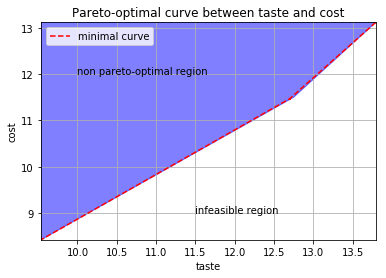

In [320]:
cost = [ dot(c,x) for x in xs ]
taste = [ dot(t, x) for x in xs ]

p1 = plt.figure(1)#, figsize=(10,8))
plt.plot(taste,cost,'--r', label='minimal curve')
plt.xlabel('taste')
plt.ylabel('cost')
plt.grid()
plt.title('Pareto-optimal curve between taste and cost')
plt.text(11.5,9,'infeasible region')
plt.text(10,12,'non pareto-optimal region')
plt.xlim(np.min(taste),np.max(taste))
plt.ylim(np.min(cost),np.max(cost))

#plt.legend(['pareto-optimal front'],loc='upper left')
x = [np.min(taste), 12.75 , np.max(taste),np.min(taste)]
y = [np.min(cost), 11.5 , np.max(cost),np.max(cost)]
plt.fill(x, y,\
         color='b',alpha=0.5)
plt.legend(loc='upper left')
p1.savefig('trade-off.png')
plt.show()

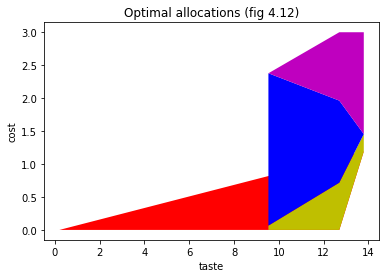

In [307]:
pylab.figure(2)
c1 = [ x[0] for x in xs ]
c2 = [ x[0] + x[1] for x in xs ]
c3 = [ x[0] + x[1] + x[2] for x in xs ]
c4 = [ x[0] + x[1] + x[2] + x[3] for x in xs ]
c5 = [ x[0] + x[1] + x[2] + x[3] + x[4] for x in xs ]
risks = taste
pylab.fill(risks + [.20], c1 + [0.0], facecolor = 'r')
pylab.fill(risks[-1::-1] + risks, c2[-1::-1] + c1,
    facecolor = 'g')
pylab.fill(risks[-1::-1] + risks, c3[-1::-1] + c2,
    facecolor = 'y')
pylab.fill(risks[-1::-1] + risks, c4[-1::-1] + c3,
    facecolor = 'b')
pylab.fill(risks[-1::-1] + risks, c5[-1::-1] + c4,
    facecolor = 'm')
#pylab.axis([0.0, 0.2, 0.0, 1.0])
pylab.xlabel('taste')
pylab.ylabel('cost')
"""pylab.text(.15,.5,'x1')
pylab.text(.10,.7,'x2')
pylab.text(.05,.7,'x3')
pylab.text(.01,.7,'x4')"""
pylab.title('Optimal allocations (fig 4.12)')
pylab.show()

In [308]:
t1 = [  x[0] for x in xs ]
t2 = [  x[1] for x in xs ]
t3 = [  x[2] for x in xs ]
t4 = [  x[3] for x in xs ]
t5 = [  x[4] for x in xs ]
plt.plot(t1, label=)
plt.plot(t2)
plt.plot(t2)
plt.plot(t3)
plt.plot(t4)
plt.plot(t5)
plt.show()

SyntaxError: invalid syntax (<ipython-input-308-b71c09c034ab>, line 6)

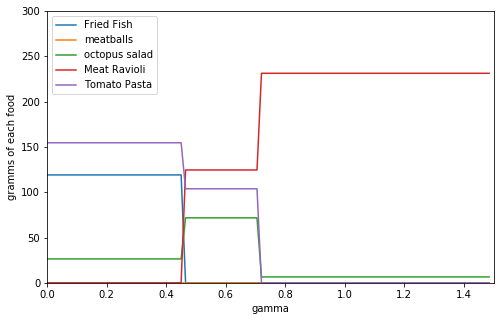

In [321]:


foods = [t1,t2,t3,t4,t5]
foods_label = ['Fried Fish','meatballs','octopus salad','Meat Ravioli','Tomato Pasta']
p2 = plt.figure(2,figsize=(8,5))
for i in range(0,len(foods)):
    #plt.fill_between(x_, 0, x)
    plt.plot(gammas,np.dot(100,foods[i]),label=foods_label[i])
plt.xlabel('gamma')
plt.ylabel('gramms of each food')
plt.xlim(0,1.5)
plt.ylim(0,300)
plt.legend(loc='best')

plt.show()
p2.savefig('gramms_of_food.png')


In [285]:
plt.plot(x_,np.mean(x_))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)